# Openpyxl

Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **5BSc DS A** <br>
Date: **30/10/2023**

---------------

**importing the dataset through pandas**

In [1]:
# importing all the necessary libraries/modules
import pandas as pd

In [2]:
# importing a dataset onto python
df = pd.read_csv("D:/Z/Downloads/sales_data_sample.csv", encoding='iso-8859-1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


# `Openpyxl`

In [3]:
# importing all the necessary libraries/modules
import openpyxl

**Instantiating an Excel Workbook**

In [4]:
# creating a new workbook
workbook = openpyxl.Workbook()

# creating a new sheet and writing the data onto the specified sheet
sheet = workbook.active

# labelling the sheet
sheet.title = 'Sales Data'

**Assigning the headers in top row**

In [5]:
# Storing the name of all the columns in a list
columns = list(df.columns)

# storing the cell values where the values are to be appeneded
header_cells = []

# appending the values in the header_cells list
for i in range(1, 26):
    header_cells.append(f"{chr(64 + i)}1")

print(header_cells)

['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1', 'K1', 'L1', 'M1', 'N1', 'O1', 'P1', 'Q1', 'R1', 'S1', 'T1', 'U1', 'V1', 'W1', 'X1', 'Y1']


In [6]:
# Assigning the header values to the cells
for i in range(len(header_cells)):
    sheet[header_cells[i]] = columns[i]

**formatting the cells**

In [7]:
from openpyxl.styles import Font, Alignment

In [8]:
# formatting the cells
for i in range(len(header_cells)):
    sheet[header_cells[i]].font = Font(bold = True)
    sheet[header_cells[i]].alignment = Alignment(horizontal = 'center')

In [9]:
# Save the workbook with the added data
workbook.save('Sales Data.xlsx')

**adding a sample of data into the excel sheet**

In [10]:
# importing all the necessary libraries/modules
from openpyxl import load_workbook

In [11]:
# Loading the existing workbook
workbook = load_workbook('Sales Data.xlsx')

# Getting the active sheet
sheet = workbook.active

In [12]:
# Randomly select 10% of the rows
sampled_data = df.sample(frac=0.1, random_state=42) 

# Start writing data from the second row, below the headers
start_row = sheet.max_row + 1

# Iterating through the sampled data and write it to the sheet sequentially
for _, row_data in sampled_data.iterrows():
    sheet.append(list(row_data))

# Formatting the cells
for i in range(1, len(df.columns) + 1):
    header_cell = sheet.cell(row=1, column=i)
    header_cell.alignment = Alignment(horizontal='center')

In [13]:
# Save the workbook with the added data
workbook.save('Sales Data.xlsx')

**creating a new sheet within the workbook**

In [14]:
from openpyxl import load_workbook

In [15]:
# Create a new sheet in the existing workbook
sheet2 = workbook.create_sheet(title='Basic Analytics')

**Adding basic analytics on the data into the new sheet**

In [16]:
# storing the summary by pandas into a seperate dataframe
summary_df = sampled_data.describe()

In [17]:
# Write the header row to the 'Basic Analytics' sheet
header_row = [''] + list(summary_df.columns)
sheet2.append(header_row)

# Write the summary statistics to the new sheet
for index, row in summary_df.iterrows():
    row_data = [index] + row.tolist()
    sheet2.append(row_data)

# Format the cells
for row in sheet2.iter_rows(min_row=1, max_row=1):
    for cell in row:
        cell.font = Font(bold=True)

In [18]:
# Save the workbook with the new 'Basic Analytics' sheet
workbook.save('Sales Data.xlsx')

**creating charts on the basic analytics**

In [19]:
# Import the necessary libraries
import matplotlib.pyplot as plt
from openpyxl.utils.dataframe import dataframe_to_rows
from io import BytesIO

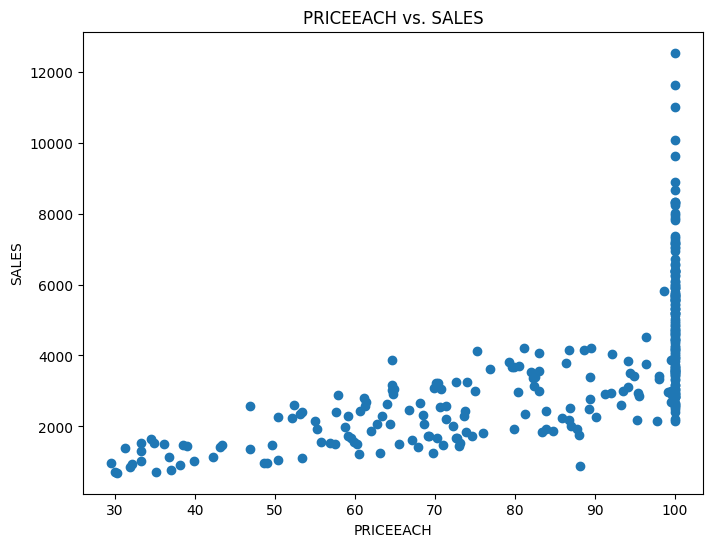

In [20]:
# Loading the existing workbook
workbook = openpyxl.load_workbook('Sales Data.xlsx')

# Creating a new sheet named 'Charts'
sheet3 = workbook.create_sheet(title='Charts')

# Loading the 'Sales Data' sheet
sales_data_sheet = workbook['Sales Data']

# defining the column names for visualization
x_column = 'PRICEEACH'
y_column = 'SALES'

# Extracting the data from the 'Sales Data' sheet for the selected columns
data = list(dataframe_to_rows(pd.read_excel('Sales Data.xlsx', sheet_name='Sales Data')))

# Converting the data to a DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Creating a scatter plot using the selected columns
plt.figure(figsize=(8, 6))
plt.scatter(df[x_column], df[y_column])
plt.title(f'{x_column} vs. {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)

# Saving the chart as an image in memory
img_buffer = BytesIO()
plt.savefig(img_buffer, format='png')
img_buffer.seek(0)

# Adding the image to the 'Charts' sheet
img = openpyxl.drawing.image.Image(img_buffer)
sheet3.add_image(img, 'A1')

In [21]:
# Save the workbook with the new 'Charts' sheet and chart
workbook.save('Sales Data.xlsx')

<hr>